In [1]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)

library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

Warning message:
"package 'ggplot2' was built under R version 4.0.3"
Warning message:
"package 'FactoMineR' was built under R version 4.0.3"
Warning message:
"package 'tidyverse' was built under R version 4.0.3"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1
v purrr   0.3.4     

Warning message:
"package 'tibble' was built under R version 4.0.3"
Warning message:
"package 'dplyr' was built under R version 4.0.3"
Warning message:
"package 'forcats' was built under R version 4.0.3"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'factoextra' was built under R version 4.0.3"
Welcome! Want to learn more? See two factoextra-related books

In [48]:
df.water.access <- read_excel("../../results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wa <- df.water.access[,c(1:23)]

   Country               imws            phom             pipy      
 Length:78          Min.   : 0.00   Min.   : 0.000   Min.   : 0.00  
 Class :character   1st Qu.:71.25   1st Qu.: 2.625   1st Qu.: 3.15  
 Mode  :character   Median :80.75   Median : 8.850   Median : 6.35  
                    Mean   :78.95   Mean   :19.427   Mean   :11.03  
                    3rd Qu.:92.35   3rd Qu.:25.775   3rd Qu.:17.35  
                    Max.   :99.90   Max.   :90.600   Max.   :54.10  
      ptap             bore             pwel             pspr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.525   1st Qu.: 0.000  
 Median :10.300   Median : 3.900   Median : 3.950   Median : 0.550  
 Mean   :11.755   Mean   :12.571   Mean   : 6.314   Mean   : 3.128  
 3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 8.825   3rd Qu.: 3.675  
 Max.   :57.700   Max.   :86.400   Max.   :48.100   Max.   :47.900  
      rain             uiws       

Country,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
Albania,98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
Angola,66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
Armenia,99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
Azerbaijan,90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
Bangladesh,97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3


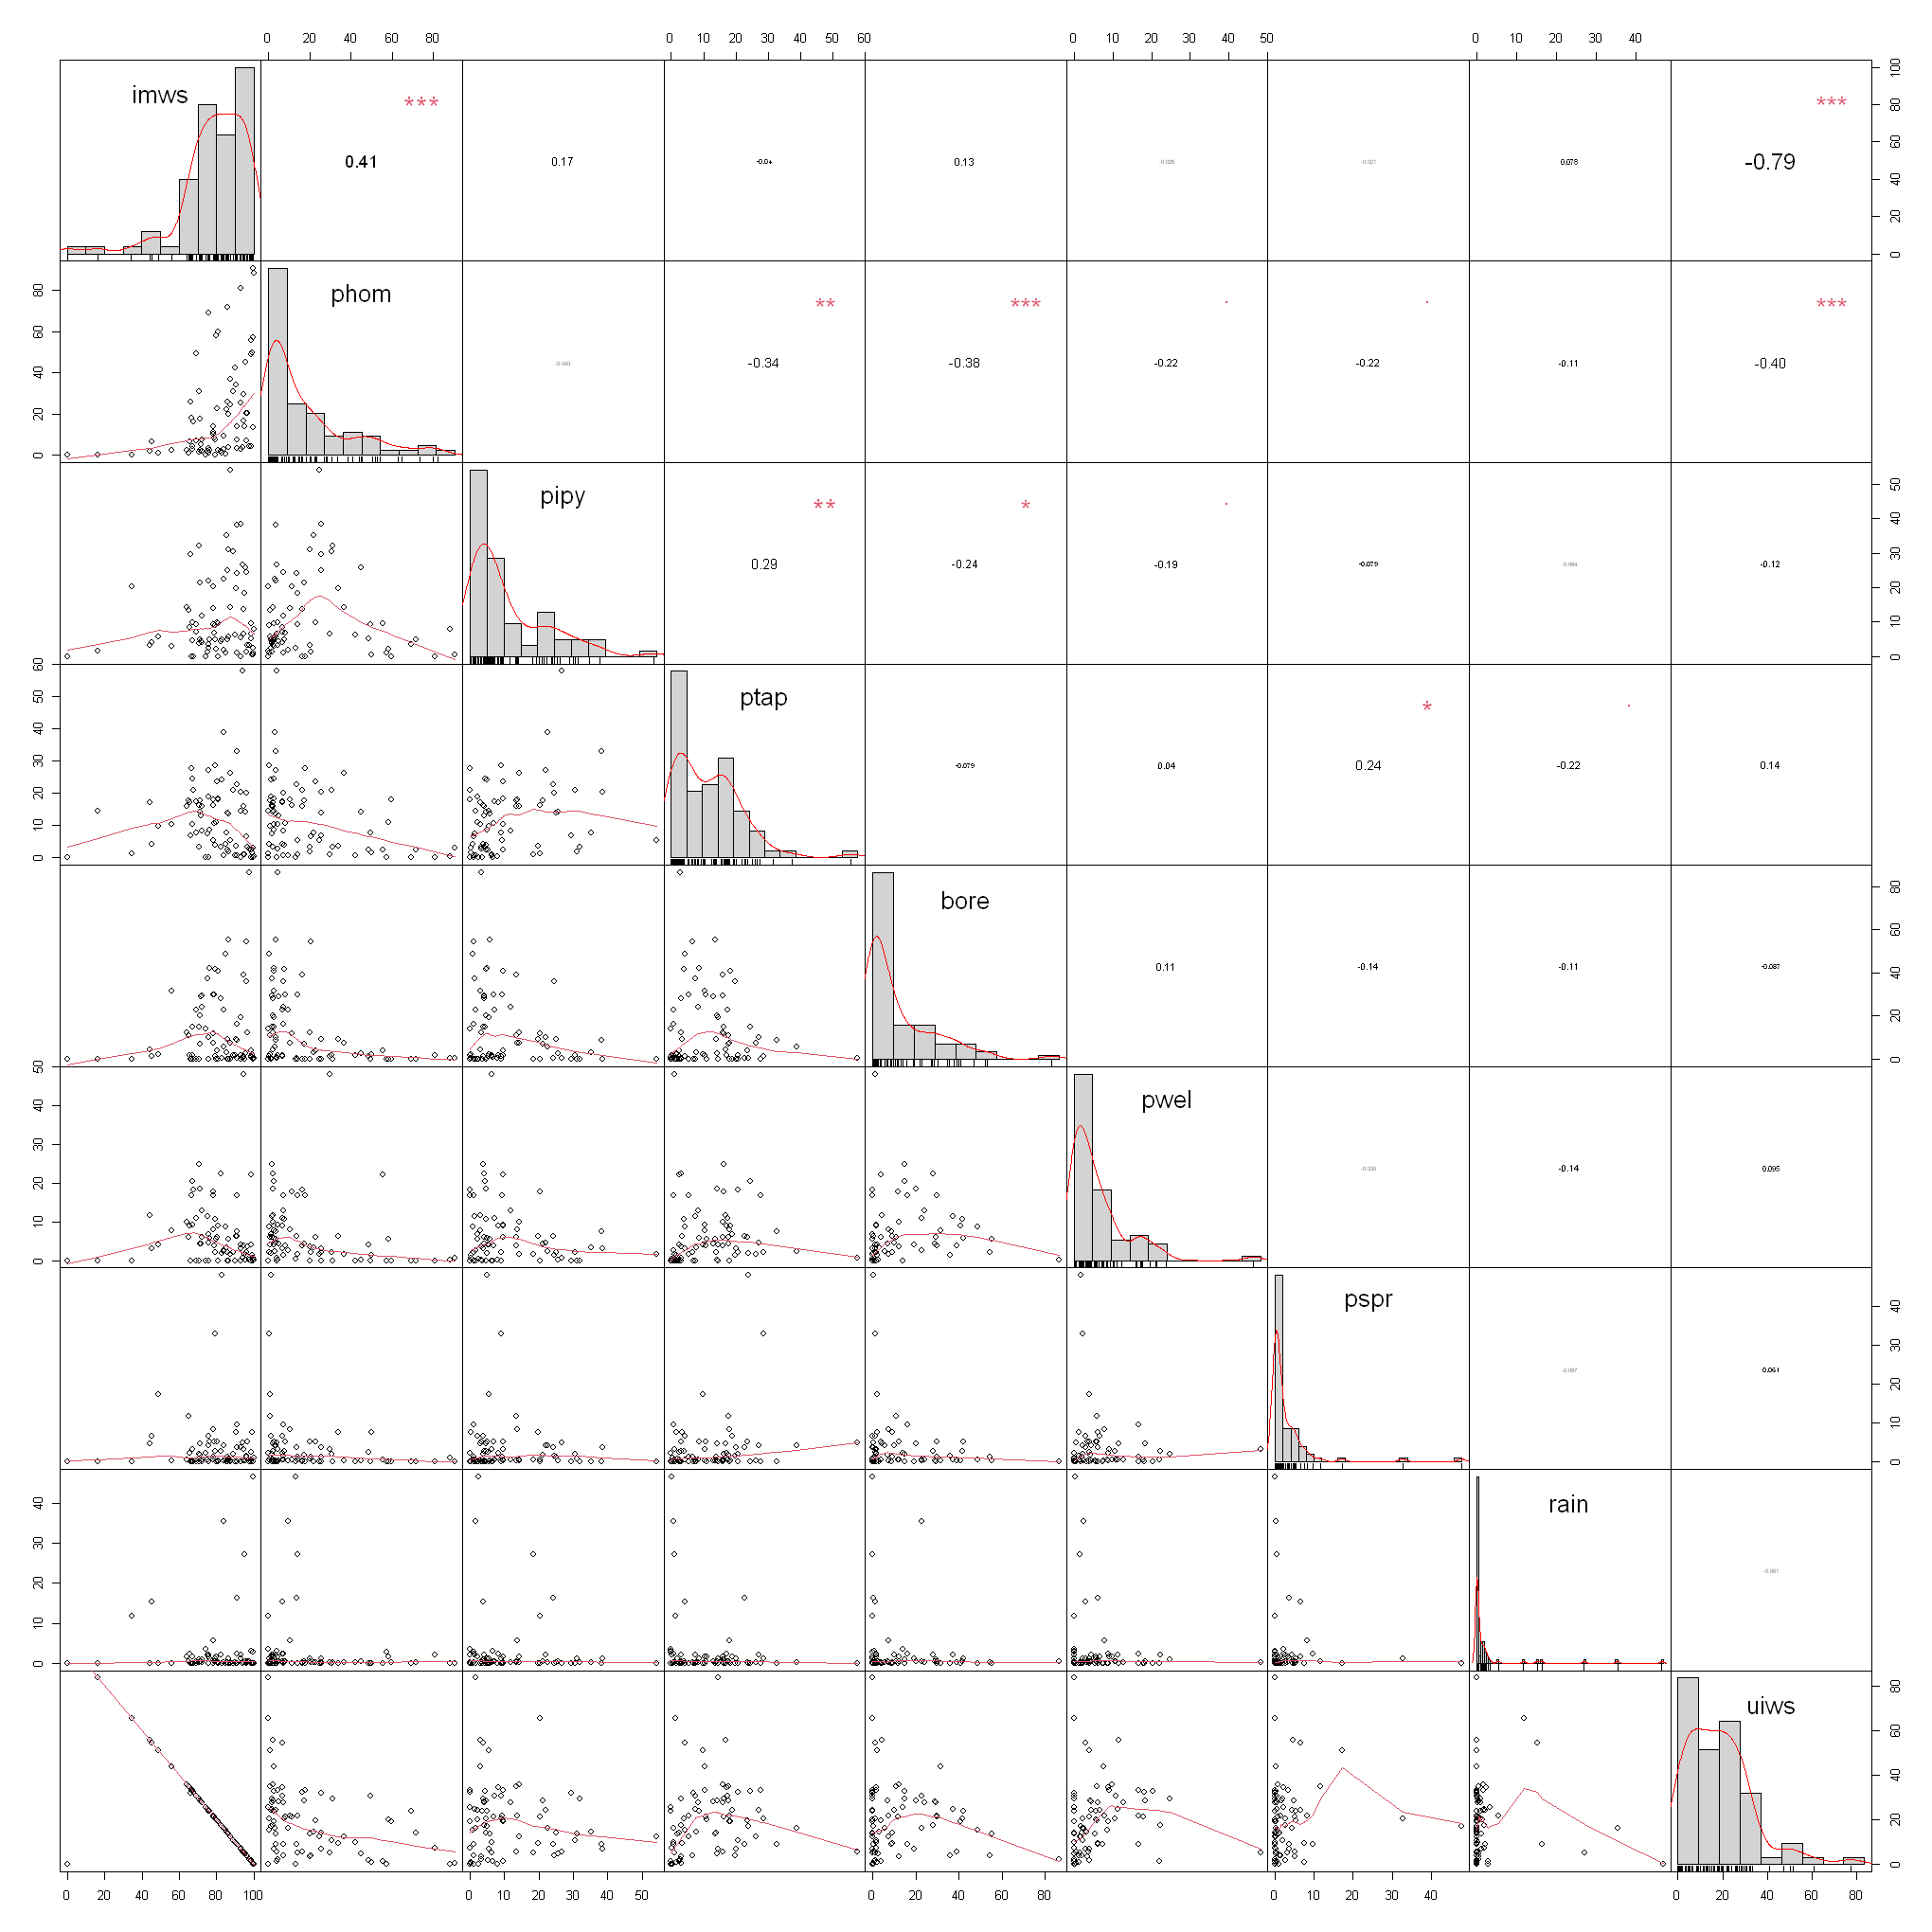

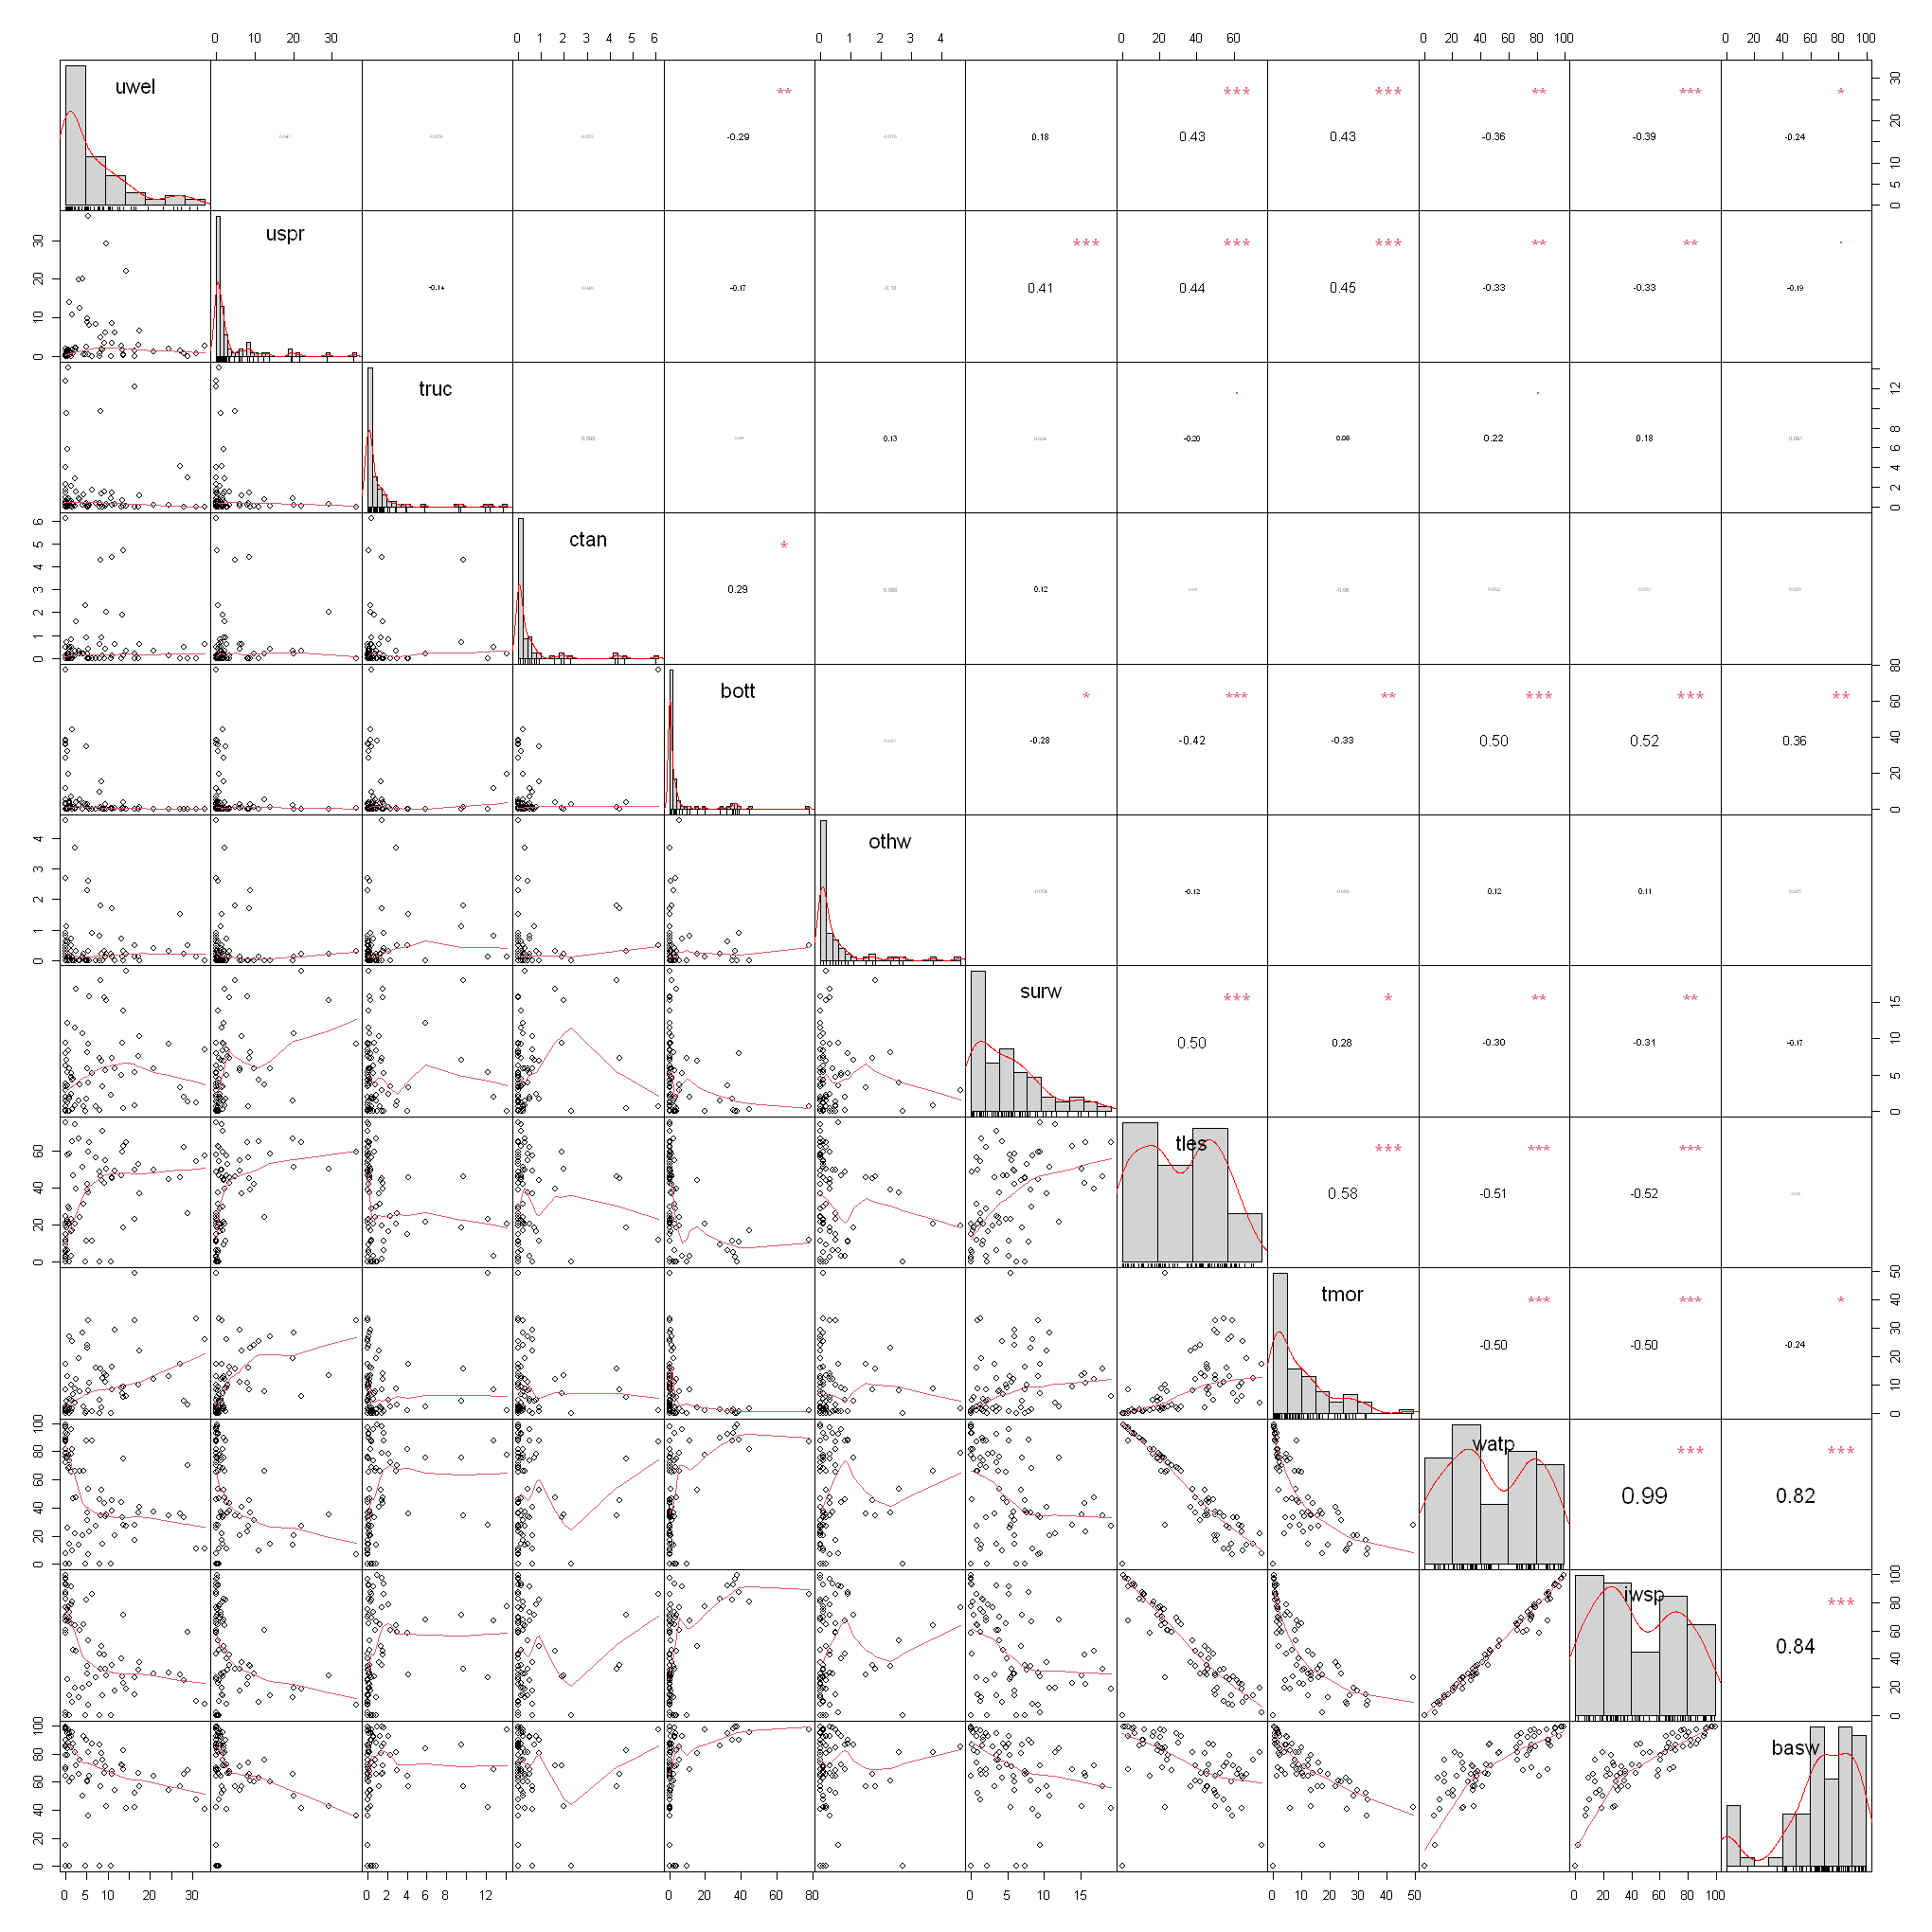

In [49]:
summary(df.wa)
head(df.wa)
chart.Correlation(df.wa[,2:10], histogram=TRUE, pch=19 , tl.cex = .7 )
chart.Correlation(df.wa[,11:22], histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [50]:
# Create data: Water Accessibility Aggregate
df.wa <- df.wa[,c(2:23)]
head(df.wa)
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:23]
df.wa.aggregate

imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,28.7,11.1,...,4.4,0.2,1.7,7.3,45.2,8.2,45.3,35.4,65.3,5.0
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,1.6,0.8,...,0.2,19.6,0.1,0.0,20.6,1.1,77.9,77.0,97.0,0.9
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,33.1,8.3,...,4.3,1.2,1.8,18.0,46.1,15.6,34.5,32.6,57.0,7.5
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,1.6,0.1,97.6,97.6,99.1,0.1
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.4,0.2,...,0.7,0.1,1.1,7.0,18.7,4.4,75.9,71.2,86.4,3.4
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,2.2,0.6,...,0.1,0.3,0.1,1.2,22.7,1.6,75.5,75.1,96.4,1.3


clusters,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,...,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947,9.357895
2,89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,...,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606,1.678788
3,66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,...,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


# Extract table of cluster centroids.

[1] 124.19175 173.27668  78.05179

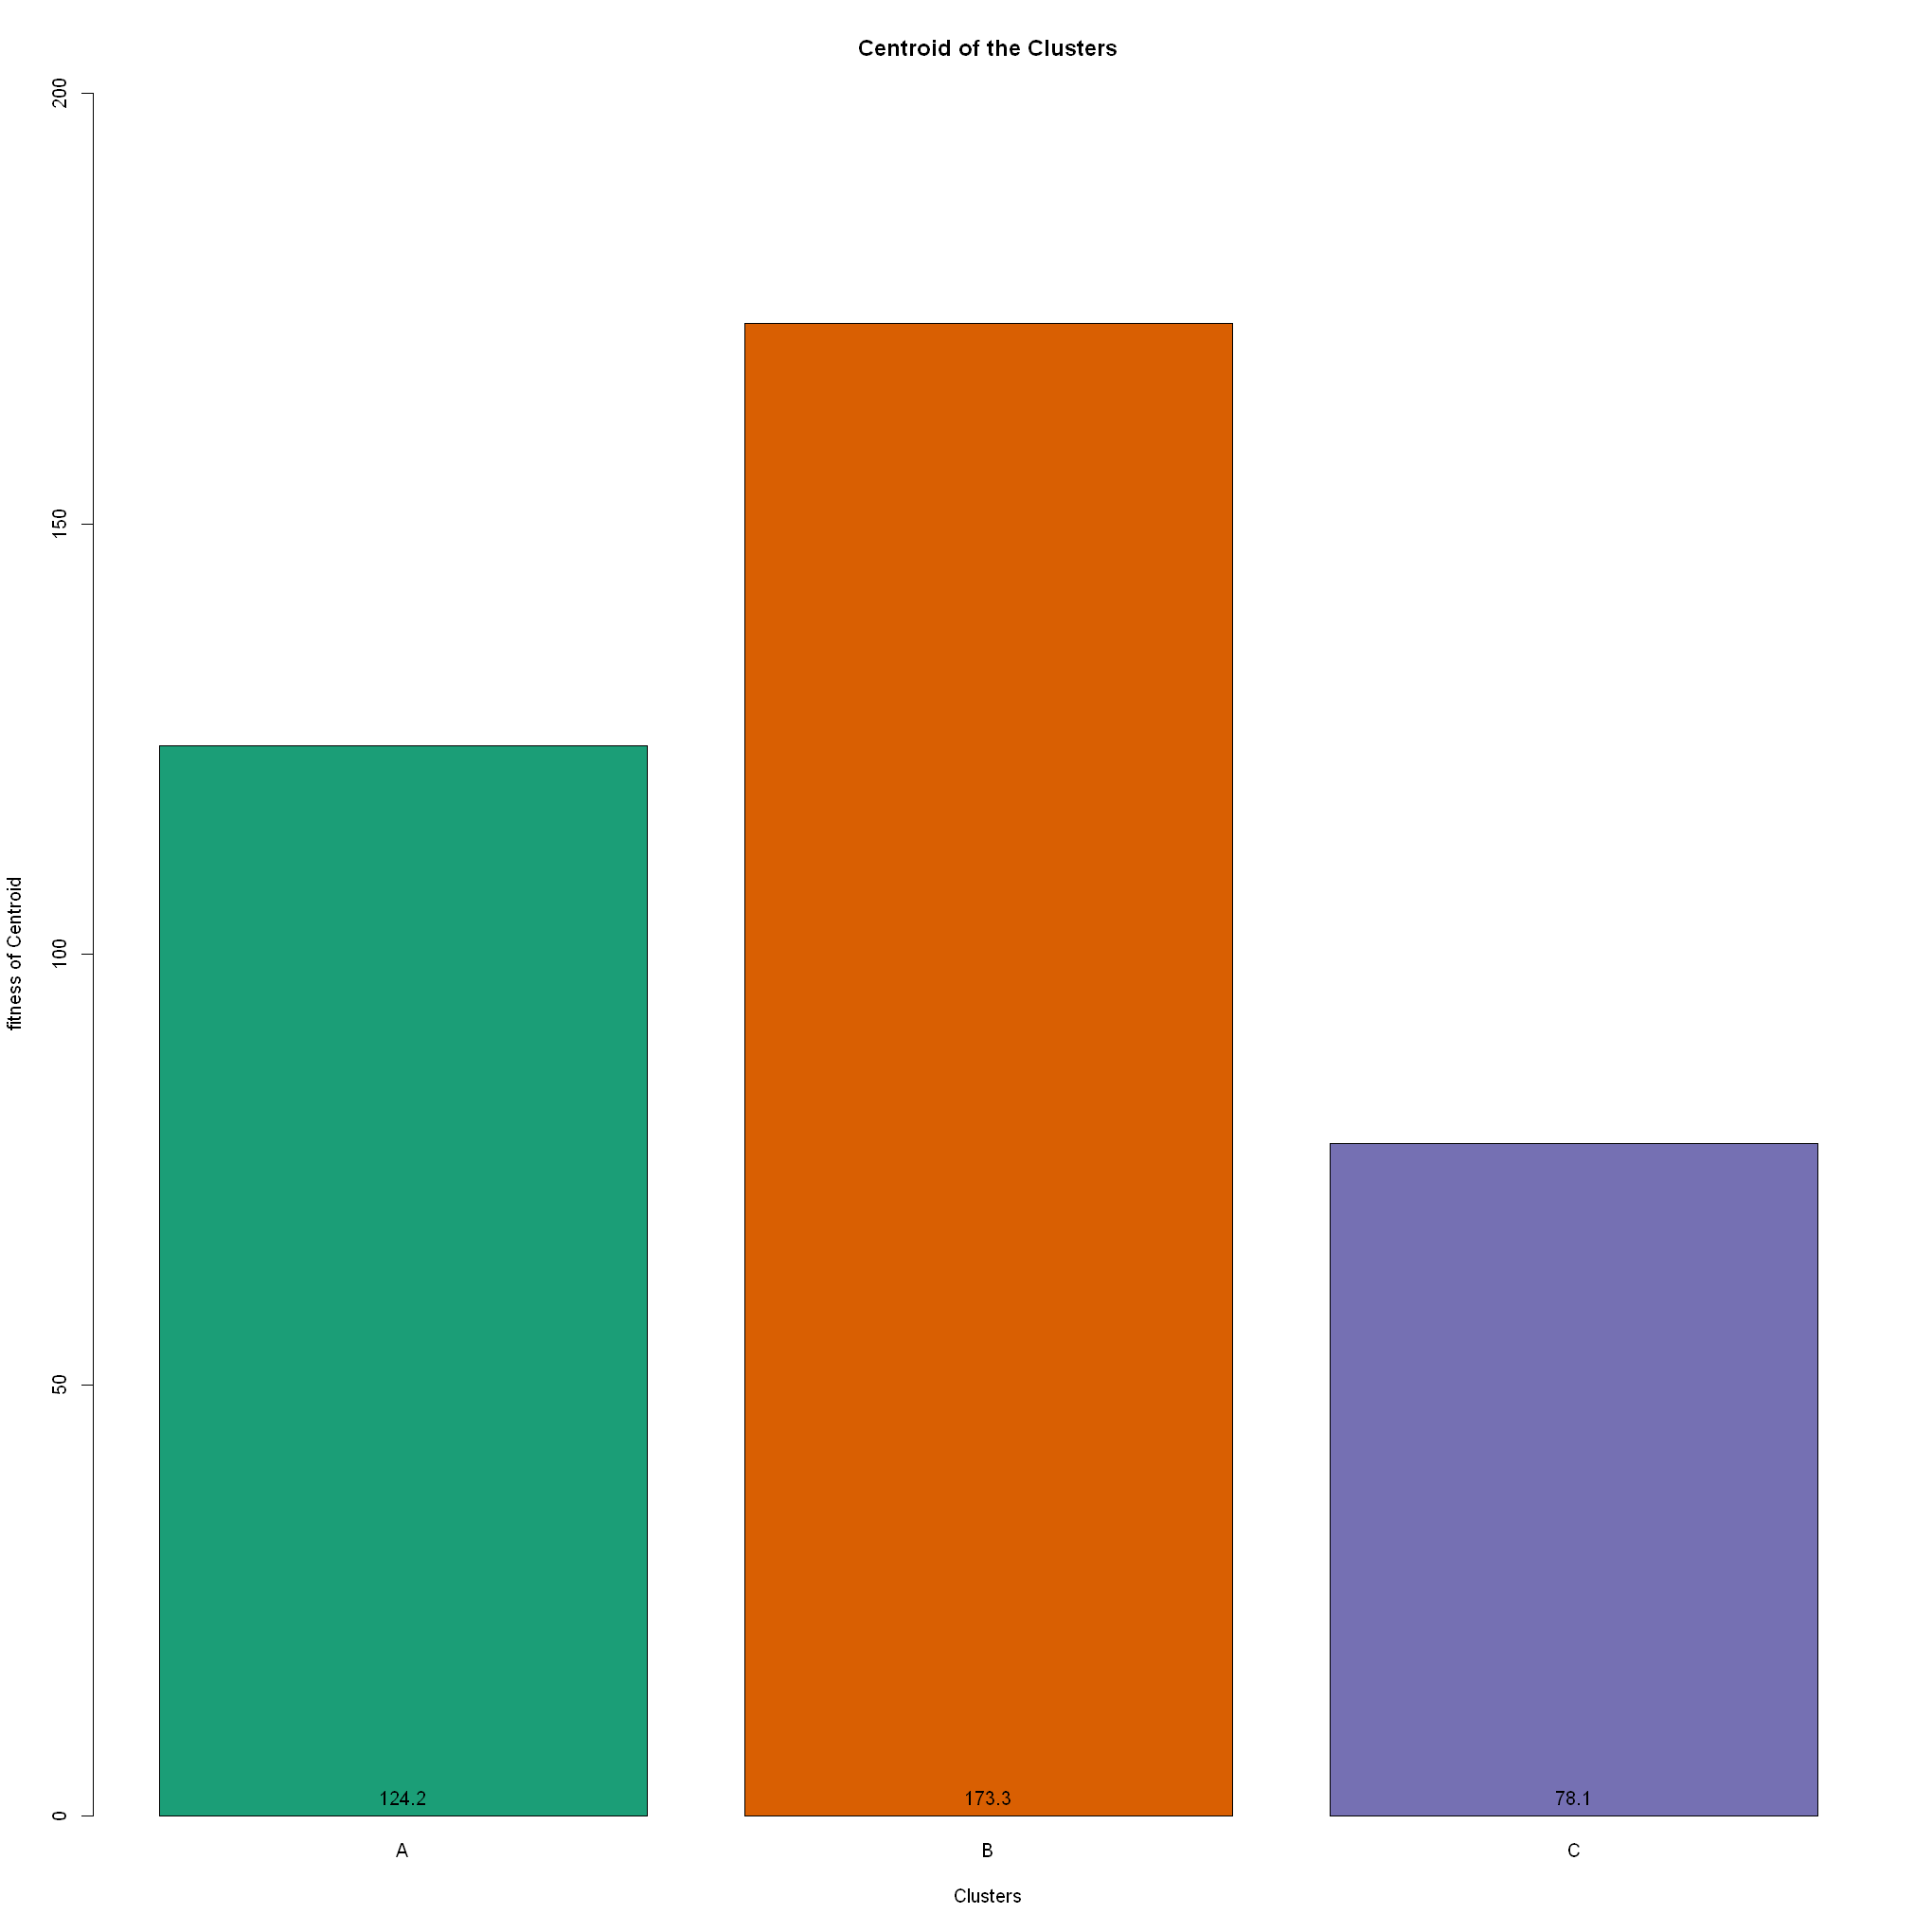

[1] 129.8893 185.8534 119.7919 216.1467 169.8596 195.5154

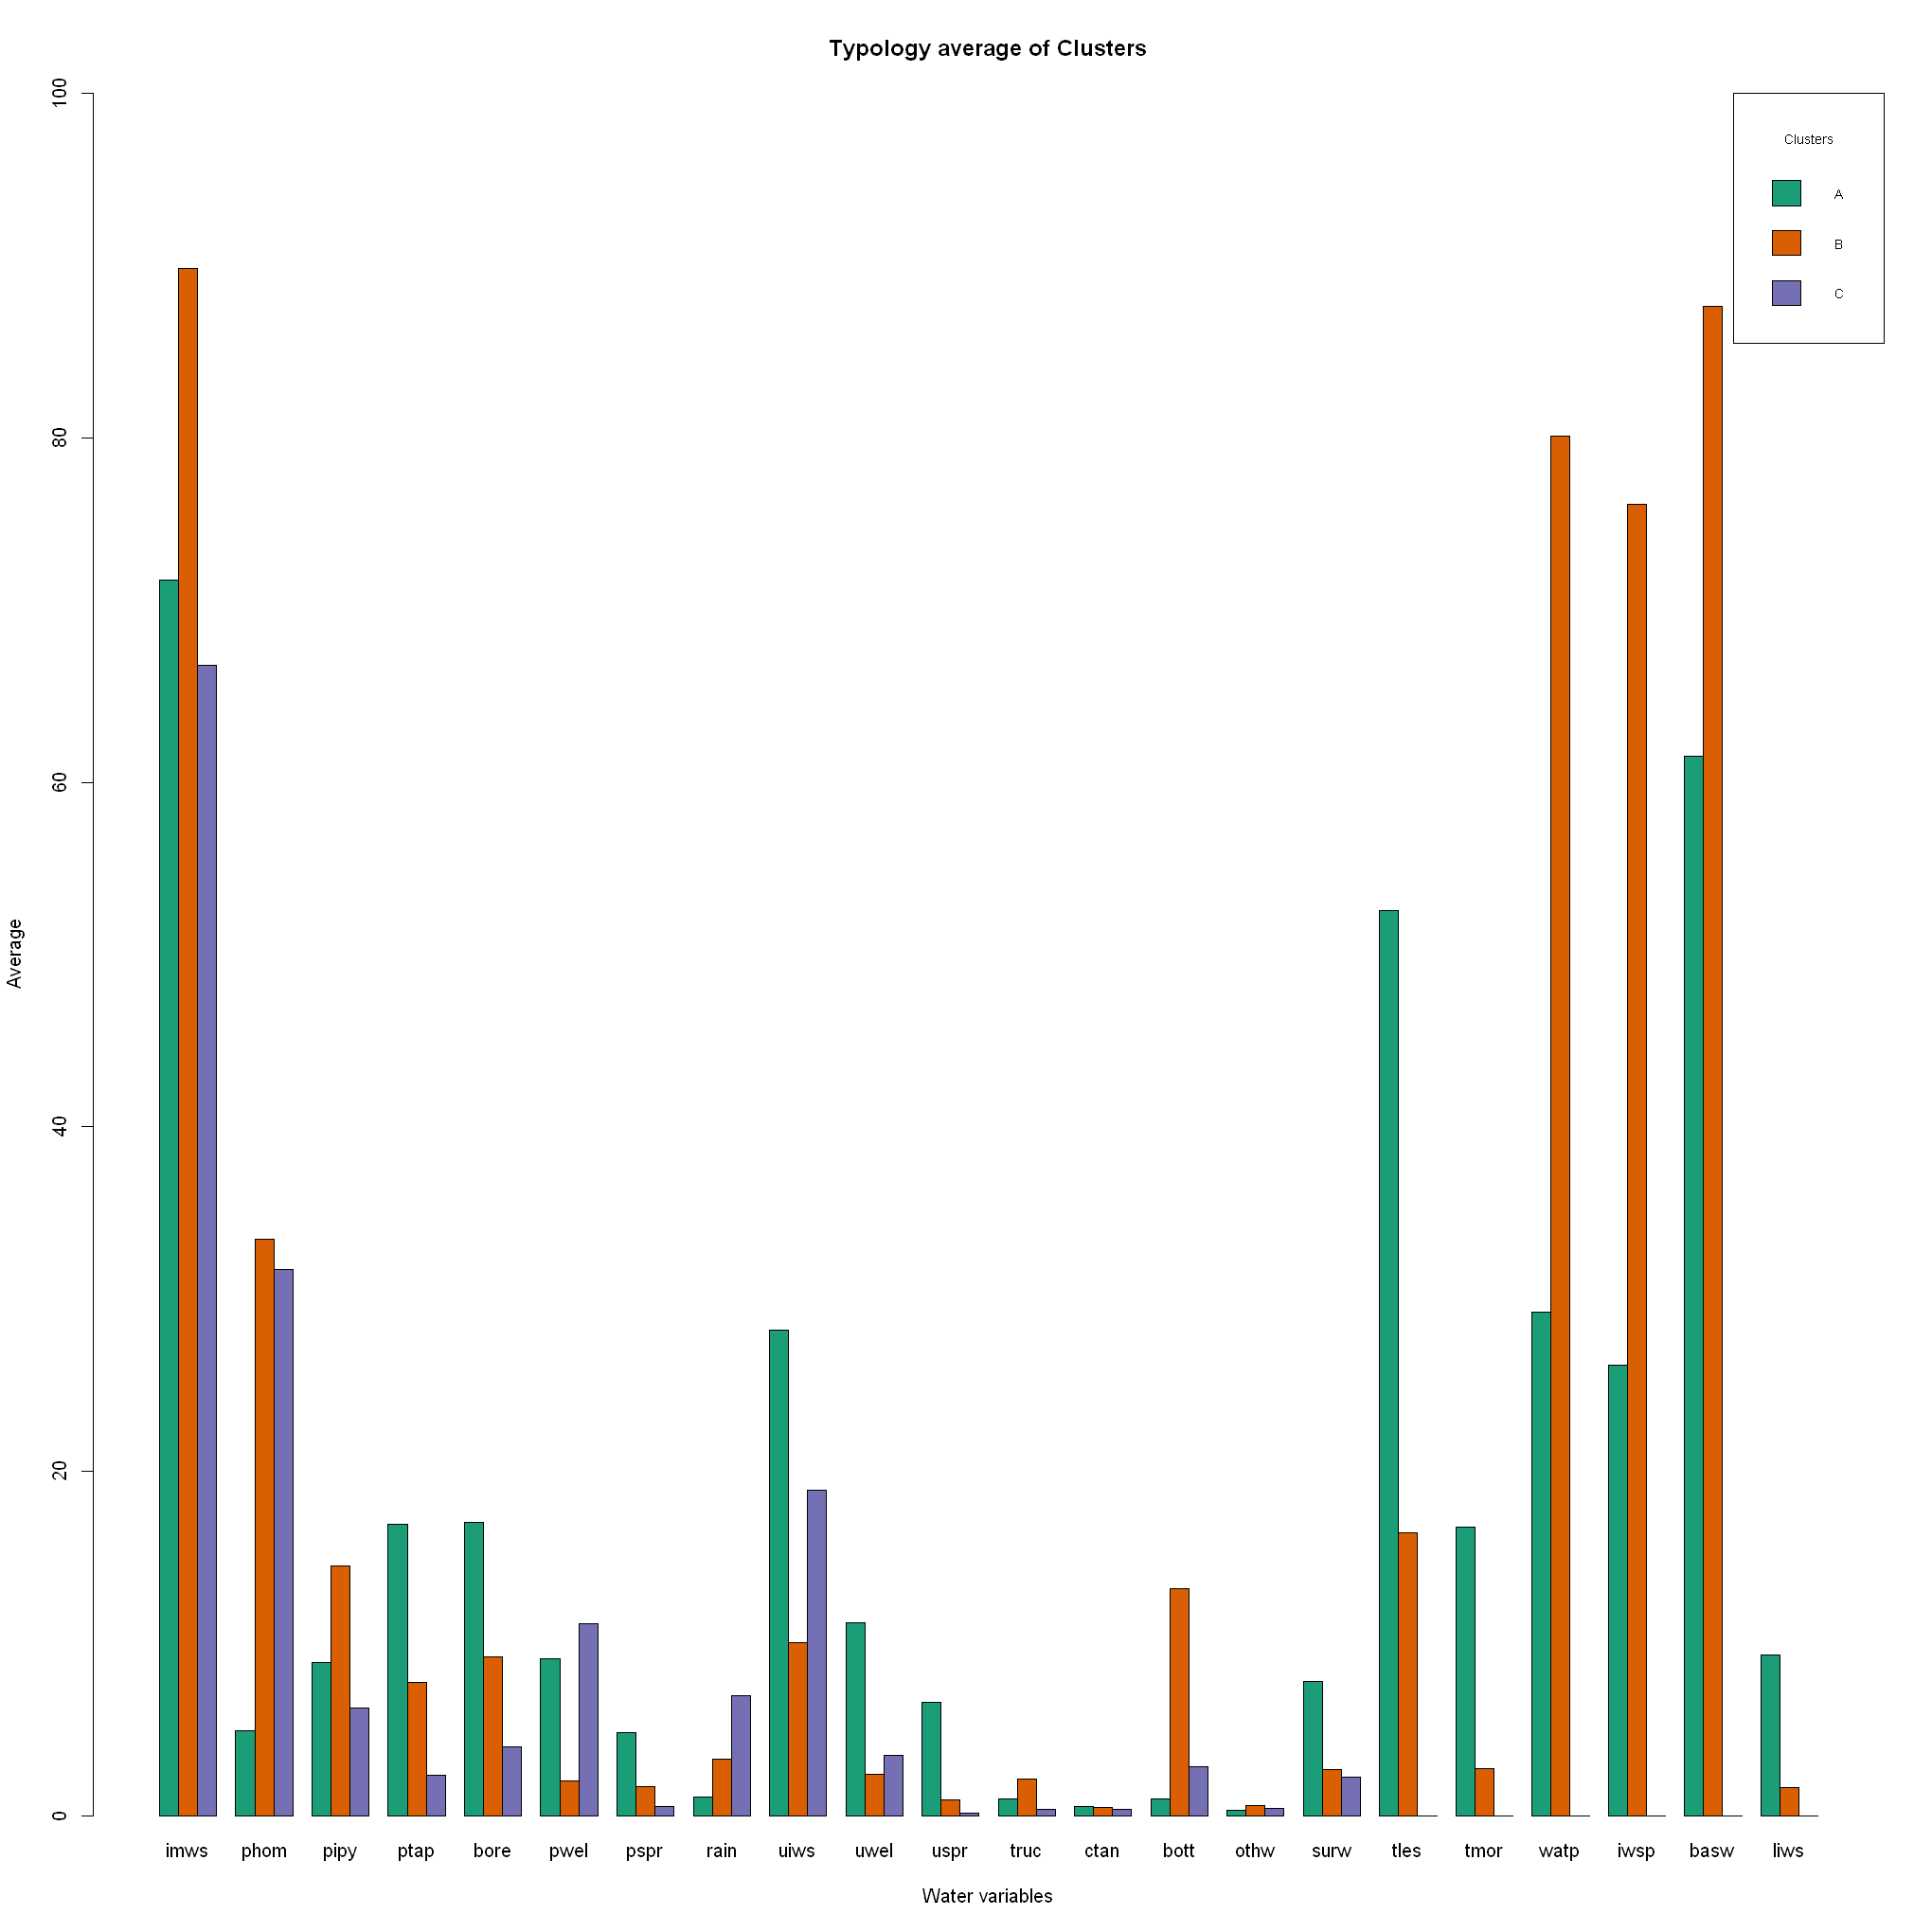

In [51]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1b9e77","#d95f02","#7570b3"),
        ylim = c(0, 200), names.arg = c("A", "B", "C"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)
options(repr.plot.width=17, repr.plot.height=17)
barplot(as.matrix(df.wa.aggregate[,c(2:23)]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#1b9e77","#d95f02","#7570b3"),
        legend = c("A", "B", "C"), 
        args.legend = list(title = "Clusters", x = "topright", cex = .7), ylim = c(0, 100))
                  


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [52]:
centroiddf.wa
str(centroiddf.wa)

[1] 129.88930 185.85336 119.79194 216.14673 169.85956 195.51540 128.56096
 [8] 185.04167 105.69328 130.05630 140.09832  96.79861 135.74082 117.44756
[15] 115.25329 203.36598 159.77368 127.59514 114.13413 138.50939 201.34672
[22] 212.88891 118.02305 132.35279 117.11682 166.43927 158.15075 153.36776
[29] 179.21568 129.78894 193.06390 129.30742 187.80506 171.41992 181.28334
[36] 210.45691 151.67927 137.61918 167.70206 140.94776 151.41407 116.57217
[43] 149.59328 205.57548 132.06389 124.32240 110.78312 102.16154 118.38226
[50] 149.51669 154.44213 175.84360 154.69515 121.19975 137.00412 179.78059
[57] 114.34024   0.00000 180.19312 185.53776 132.08671 155.67093 165.39797
[64] 129.15920 182.00918 164.38193 121.12597 150.45843 132.60483 201.28845
[71] 146.25450 126.31544 116.06464 162.74766  77.99295 154.18103 130.36380
[78] 134.03320

 num [1:78] 130 186 120 216 170 ...


# Radar Plot for the aggregated data

,imws,phom,pipy,ptap,bore,pwel,pspr,rain,uiws,uwel,...,ctan,bott,othw,surw,tles,tmor,watp,iwsp,basw,liws
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000000,100.000000,100.00000,100.000000,...,100.0000000,100.000000,100.0000000,100.000000,100.00000,100.000000,100.00000,100.00000,100.00000,100.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000000,0.000000,0.00000,0.000000,...,0.0000000,0.000000,0.0000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000
3,71.75263,4.976316,8.894737,16.957895,17.028947,9.110526,4.8447368,1.128947,28.21053,11.242105,...,0.5342105,1.000000,0.3447368,7.784211,52.57632,16.778947,29.25789,26.18684,61.48947,9.357895
4,89.81818,33.460606,14.506061,7.760606,9.245455,2.060606,1.7030303,3.290909,10.09091,2.427273,...,0.5060606,13.209091,0.6121212,2.672727,16.41818,2.769697,80.09091,76.12424,87.60606,1.678788
5,66.77143,31.714286,6.271429,2.342857,4.042857,11.185714,0.5285714,6.985714,18.90000,3.528571,...,0.4142857,2.871429,0.4428571,2.242857,0.00000,0.000000,0.00000,0.00000,0.00000,0.000000


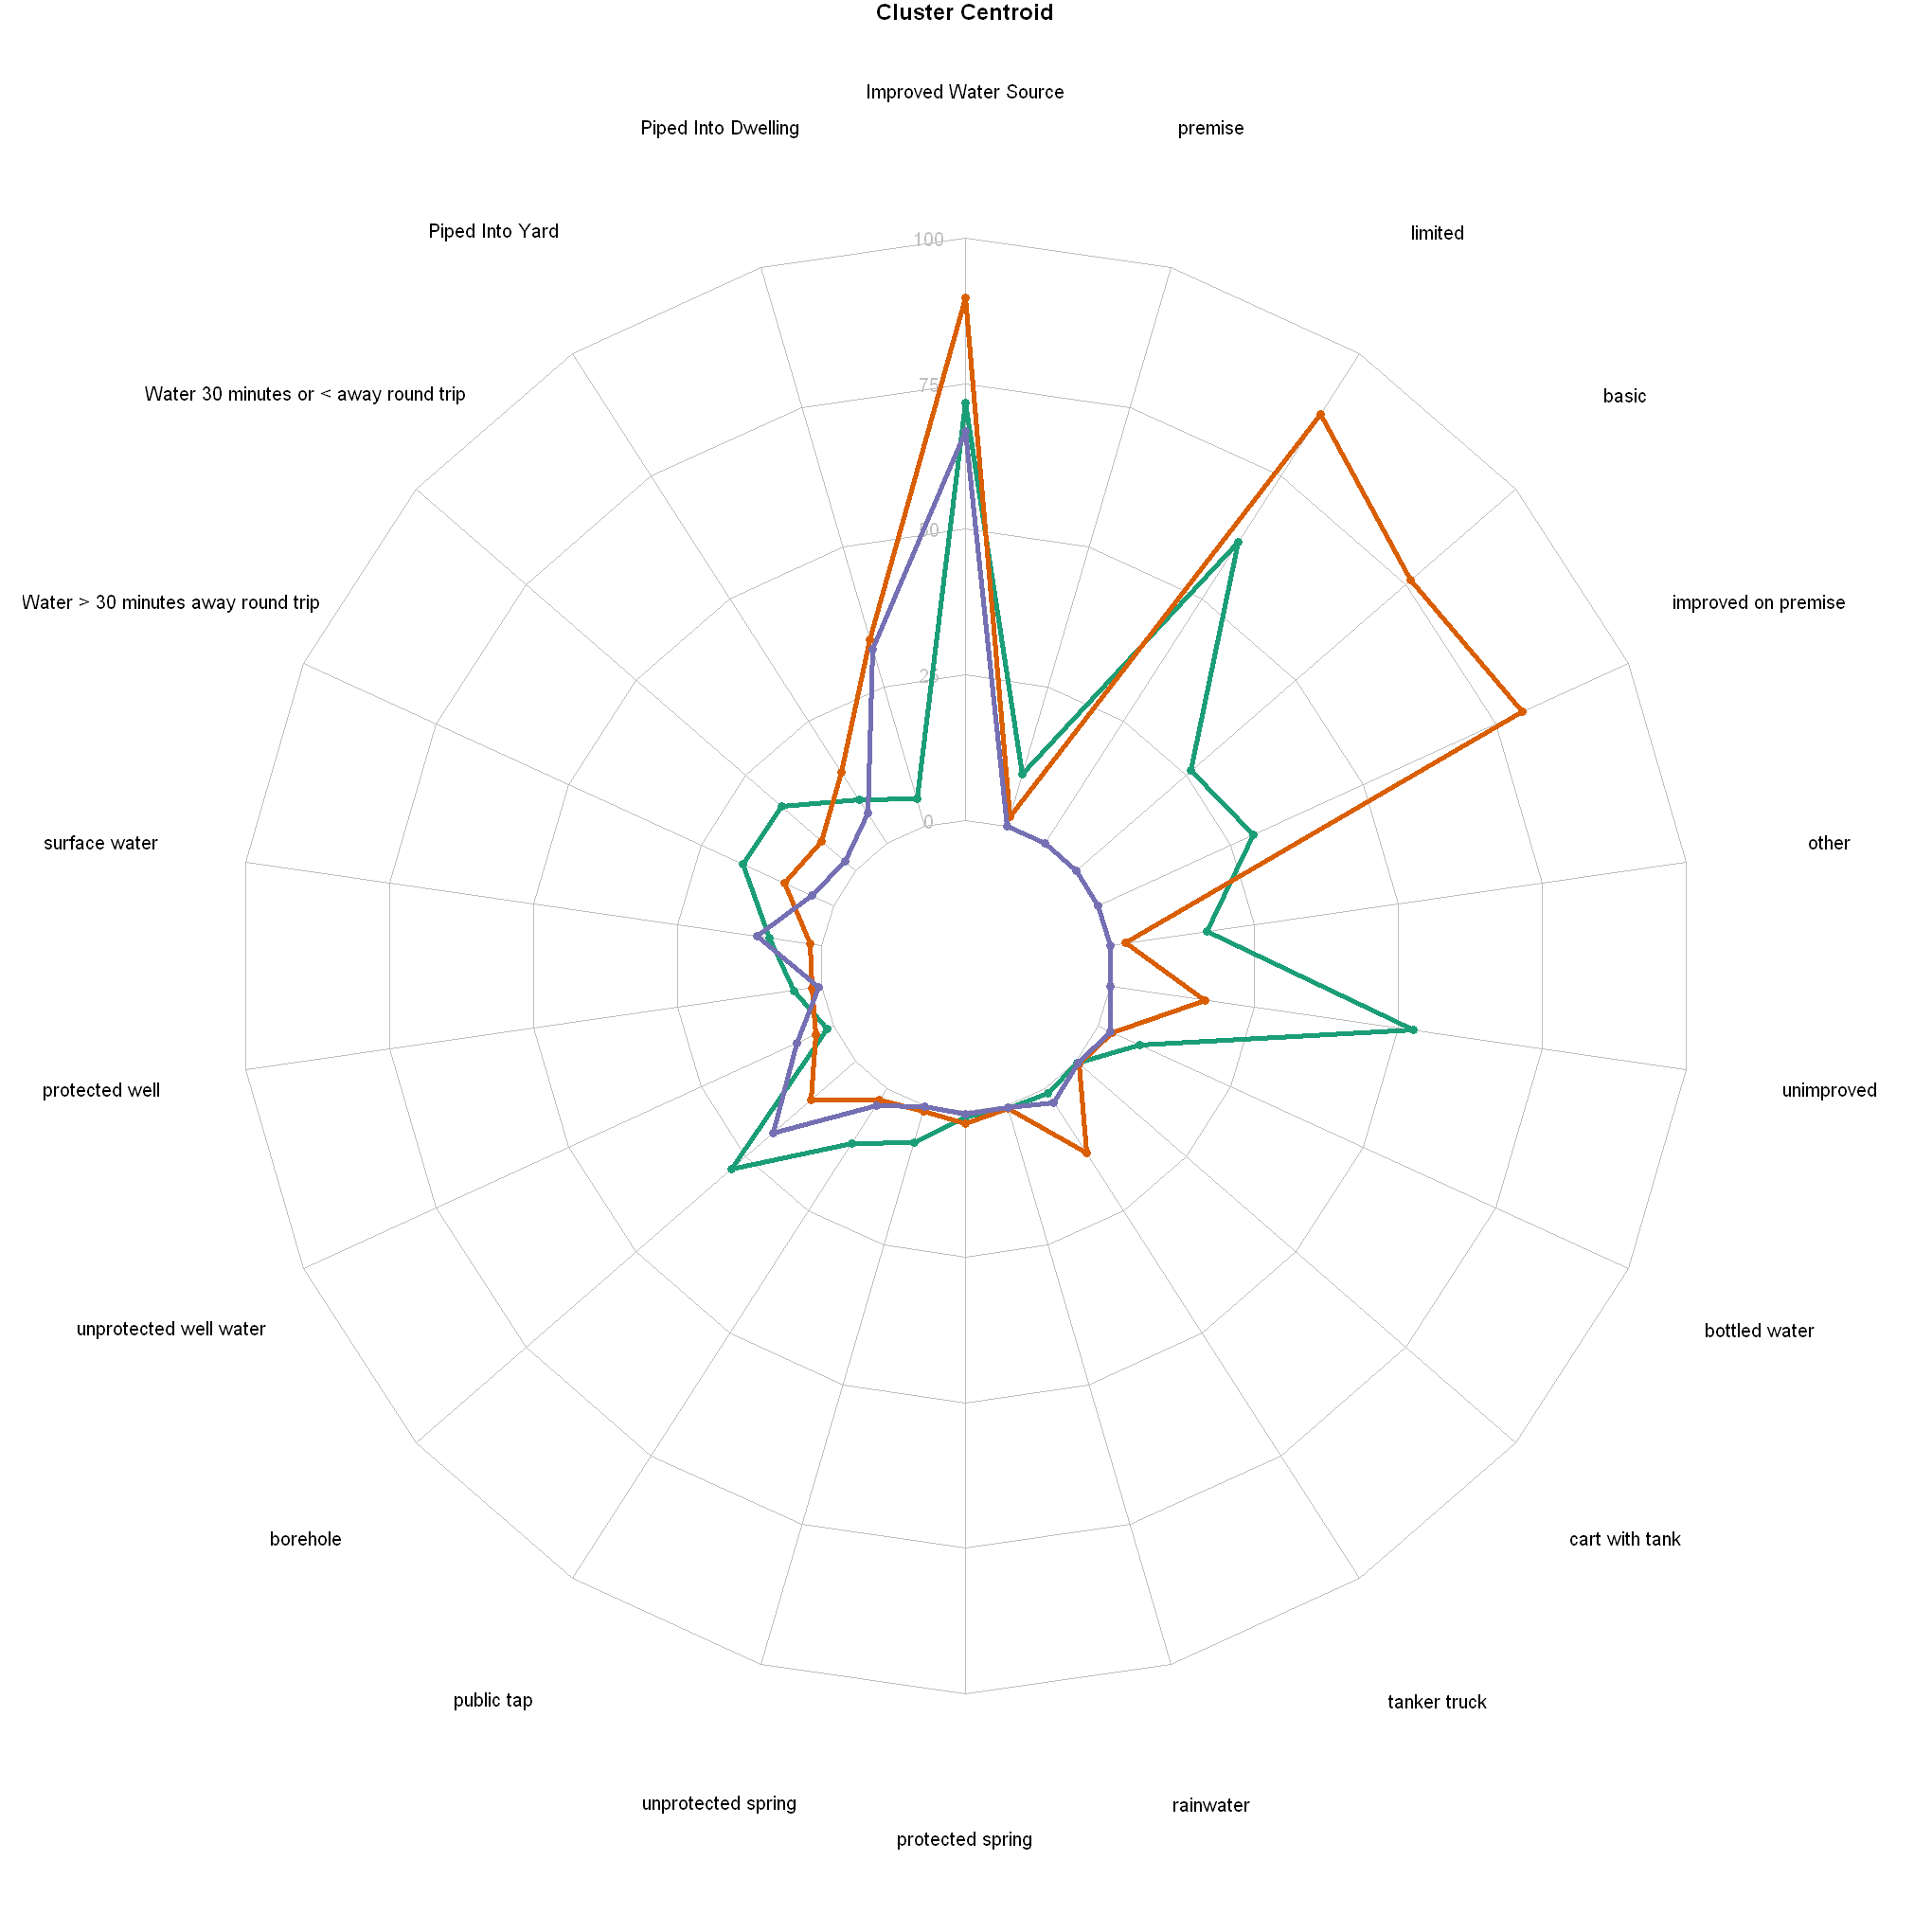

In [56]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
#max.aggregate = apply(df.wa.aggregate,2,max)
#apply(df.wa.aggregate,2,min)
#max.aggregate
#norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')

data.spider <- rbind(rep(100,50) , rep(0,10) , df.wa.aggregate[,c(2:23)])

head(data.spider,7)
colnames(data.spider) <- c(
                            'Improved Water Source',
    "Piped Into Dwelling",
    'Piped Into Yard',
                            "Water 30 minutes or < away round trip" , 
                           "Water > 30 minutes away round trip" , 
                           "surface water" , 
                           "protected well" , 
                           "unprotected well water", 
                           "borehole" , 
                           "Public Tap" , 
                           "unprotected spring", 
                           "protected spring", 
                           "rainwater" ,
                           
                           'tanker truck', 
                           'cart with tank',
                           'bottled water',
                           'unimproved',
                           'other',
                           'improved on premise',
                           'basic',
                           'limited',
                           'premise')

options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1b9e77","#d95f02","#7570b3") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,100,25), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,1.128947,...,71.75263,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895
7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,3.290909,...,89.81818,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788
2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,6.985714,...,66.77143,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


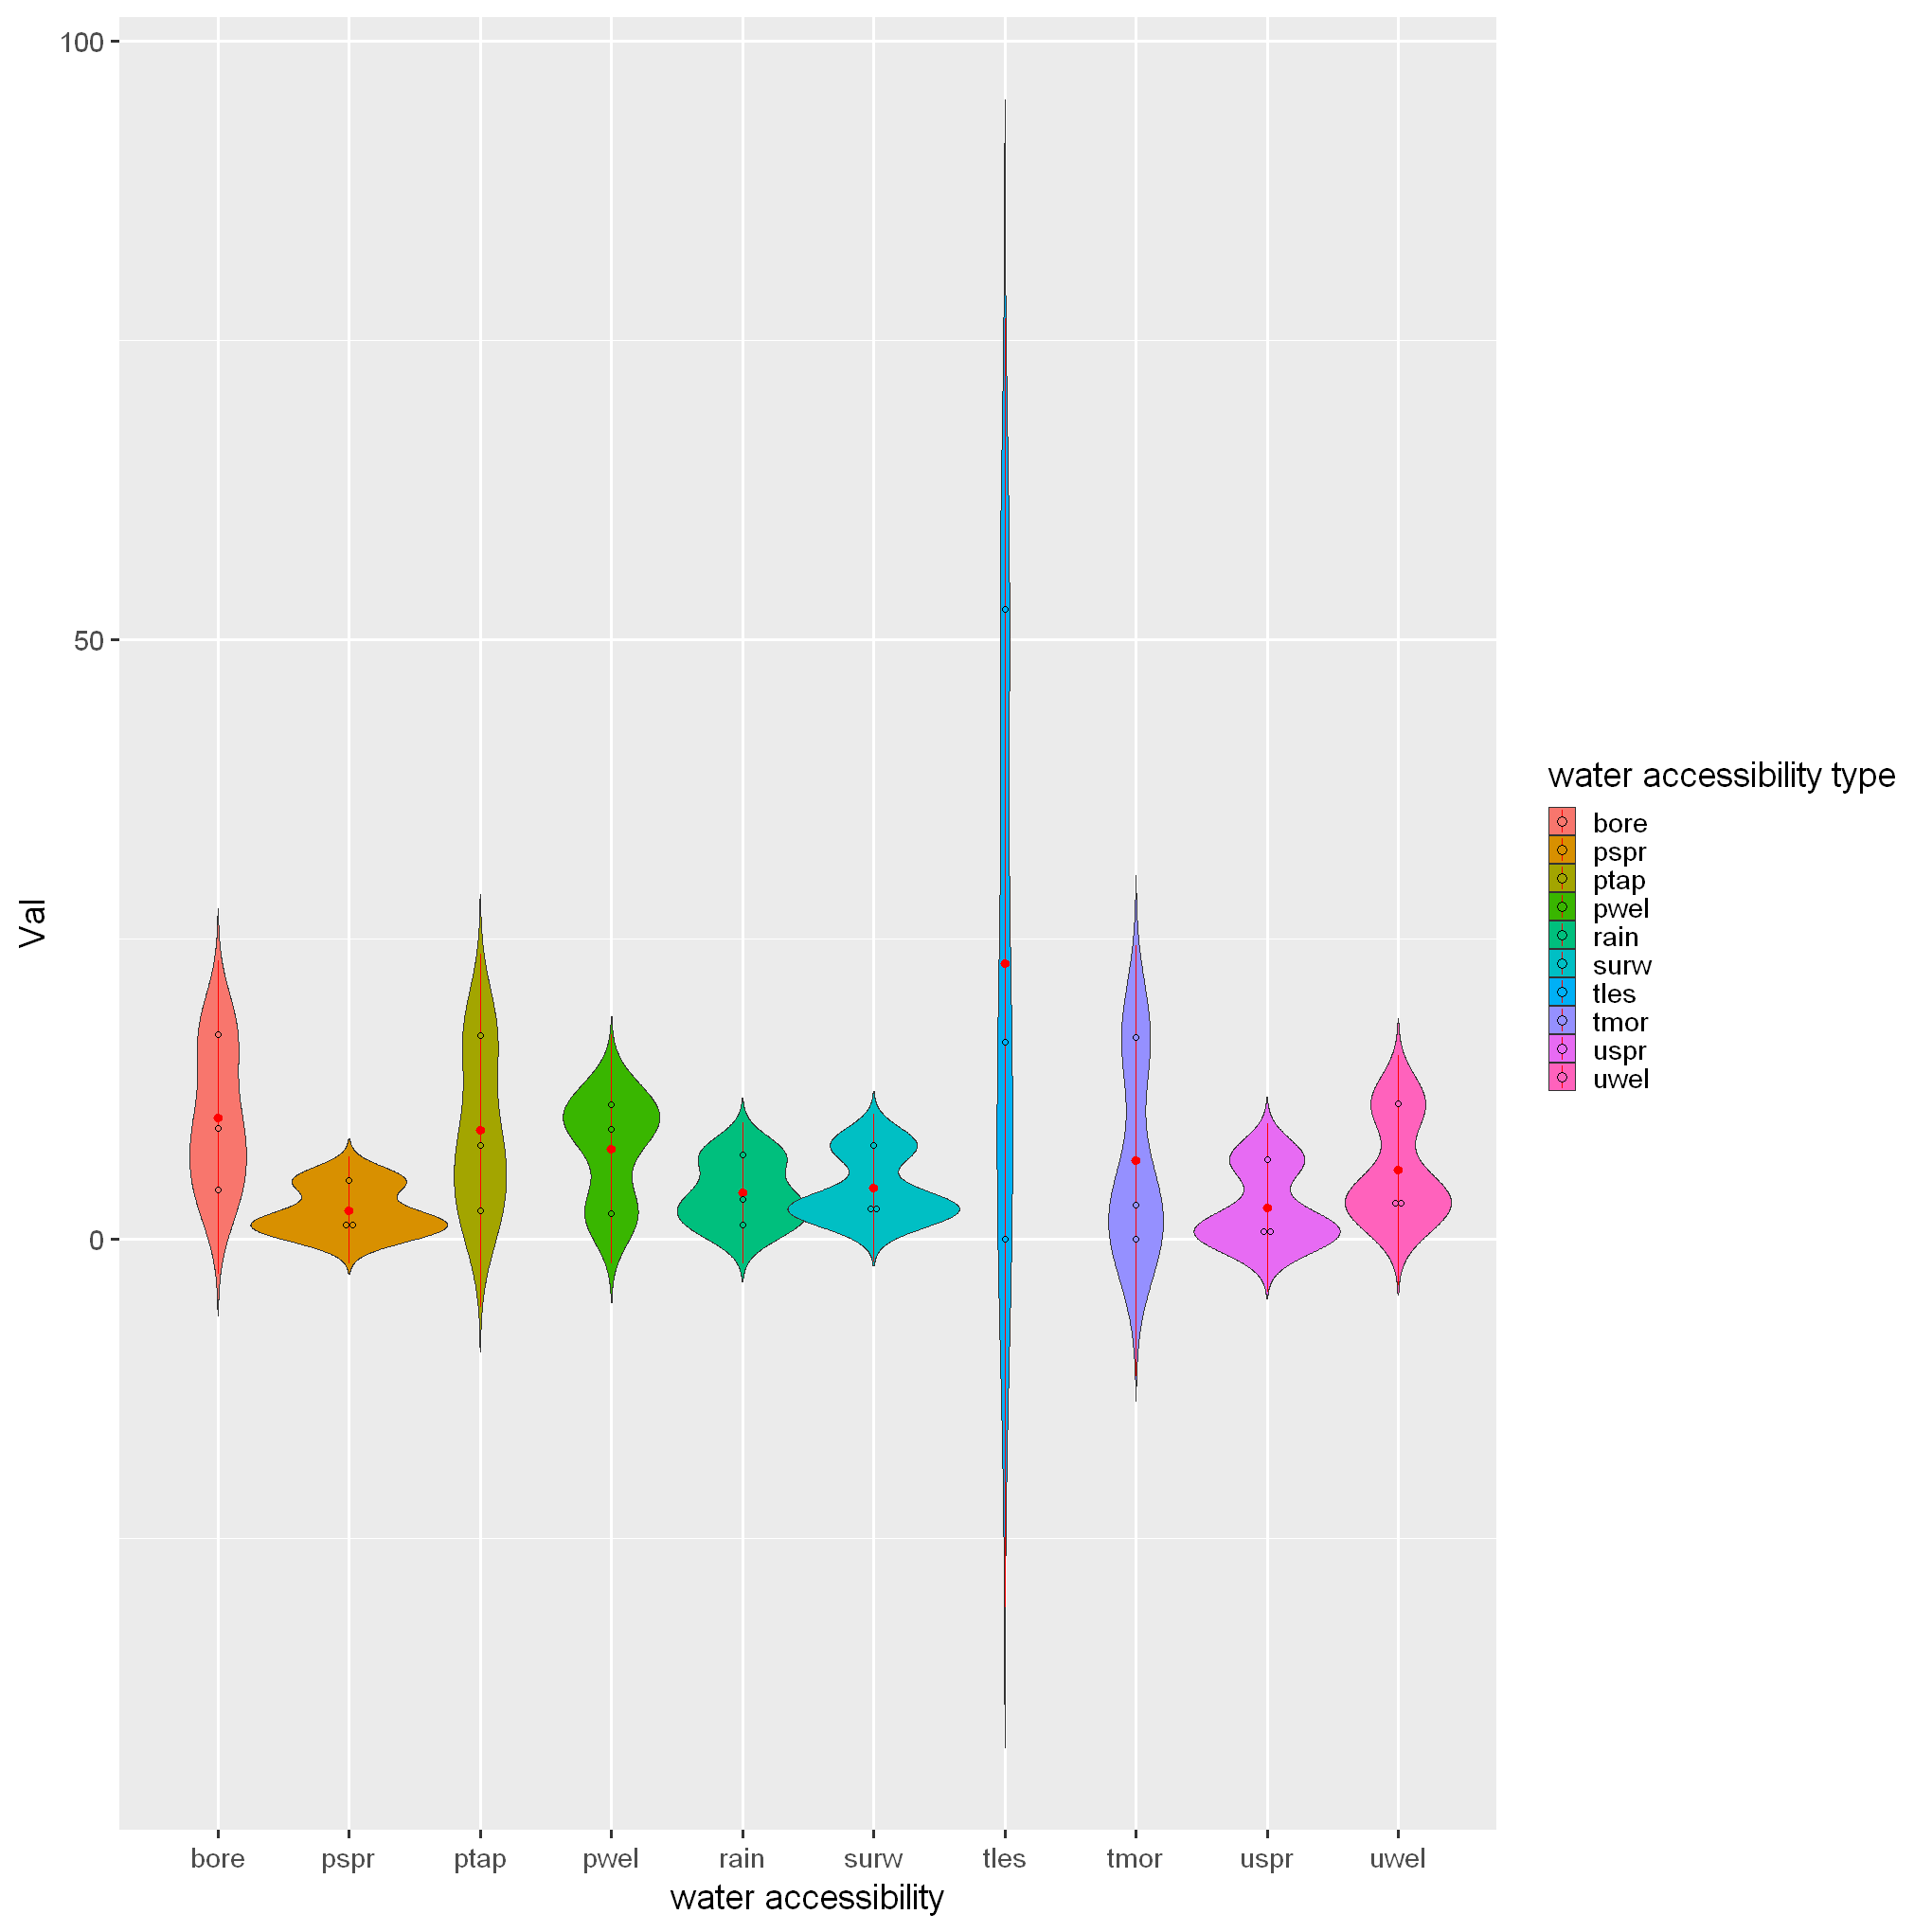

In [11]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 1:10]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,1.128947,...,71.75263,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895
7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,3.290909,...,89.81818,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788
2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,6.985714,...,66.77143,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



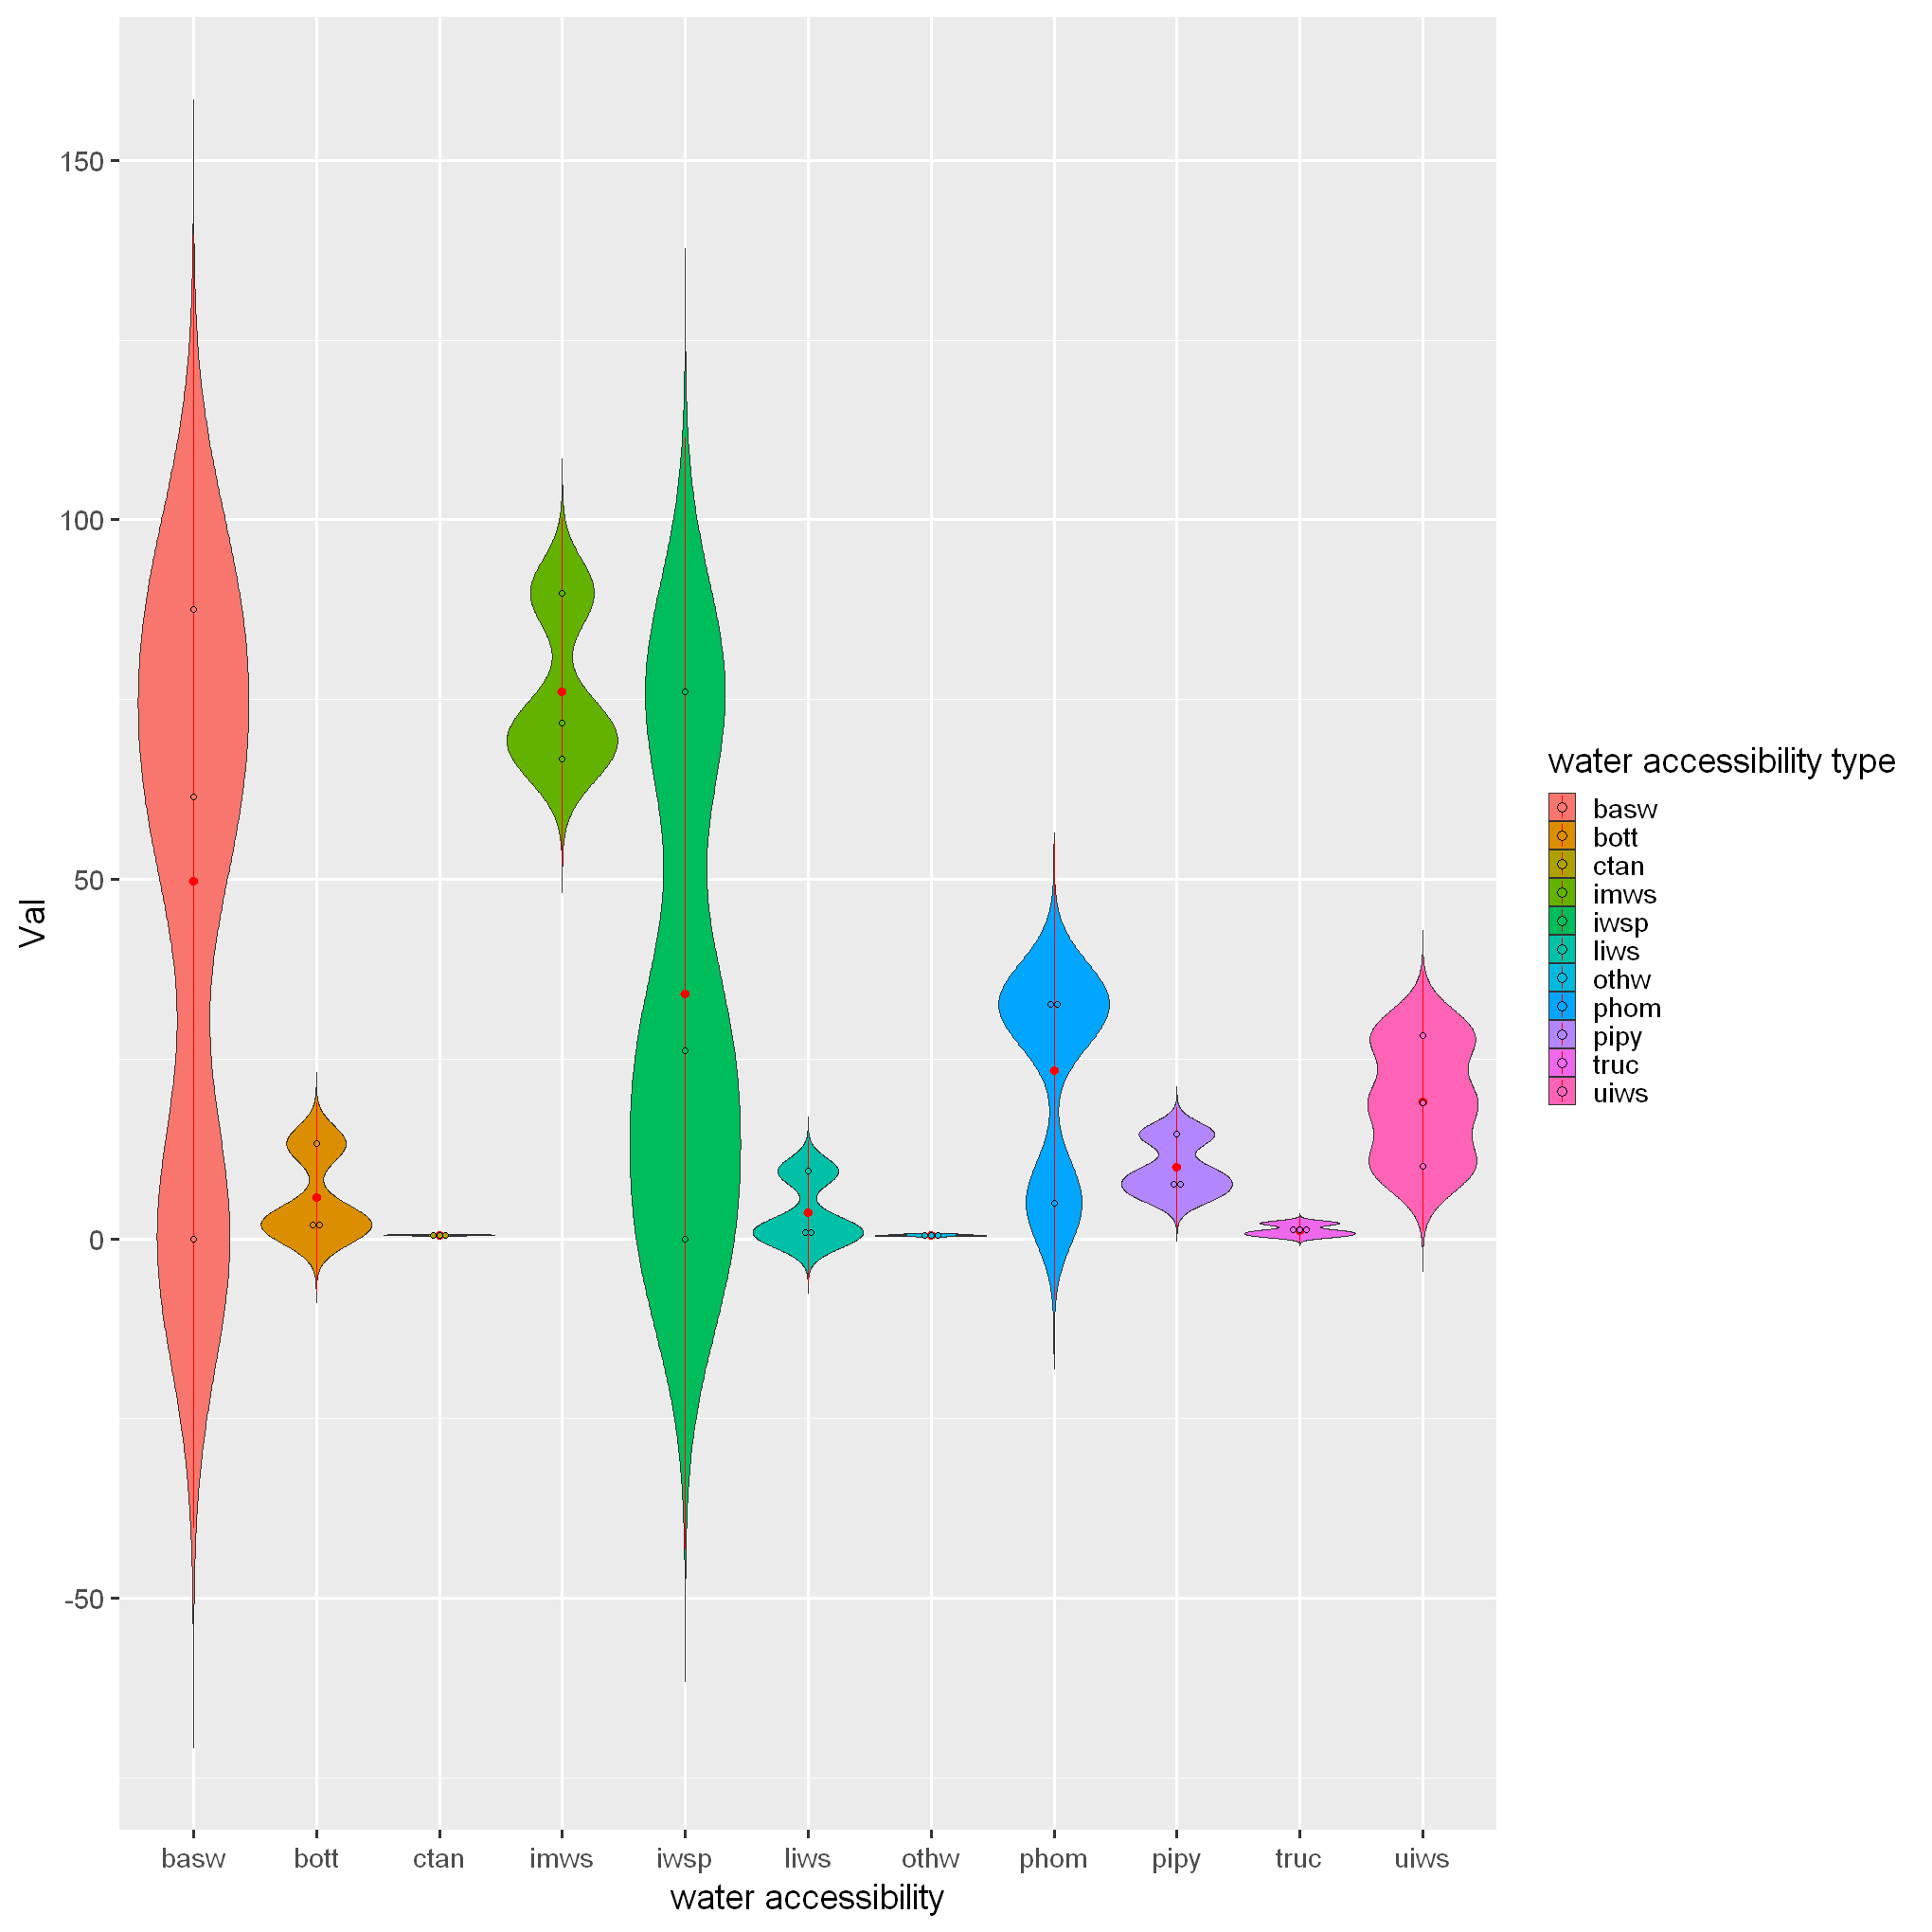

In [12]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 11:21]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, scale = "width"  , size=.3, adjust = .75) + 
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Country's Centroids Rankings Demo


 1  2  3 
38 33  7 

ERROR: Error in eval(expr, envir, enclos): object 'df4_clus_avg' not found


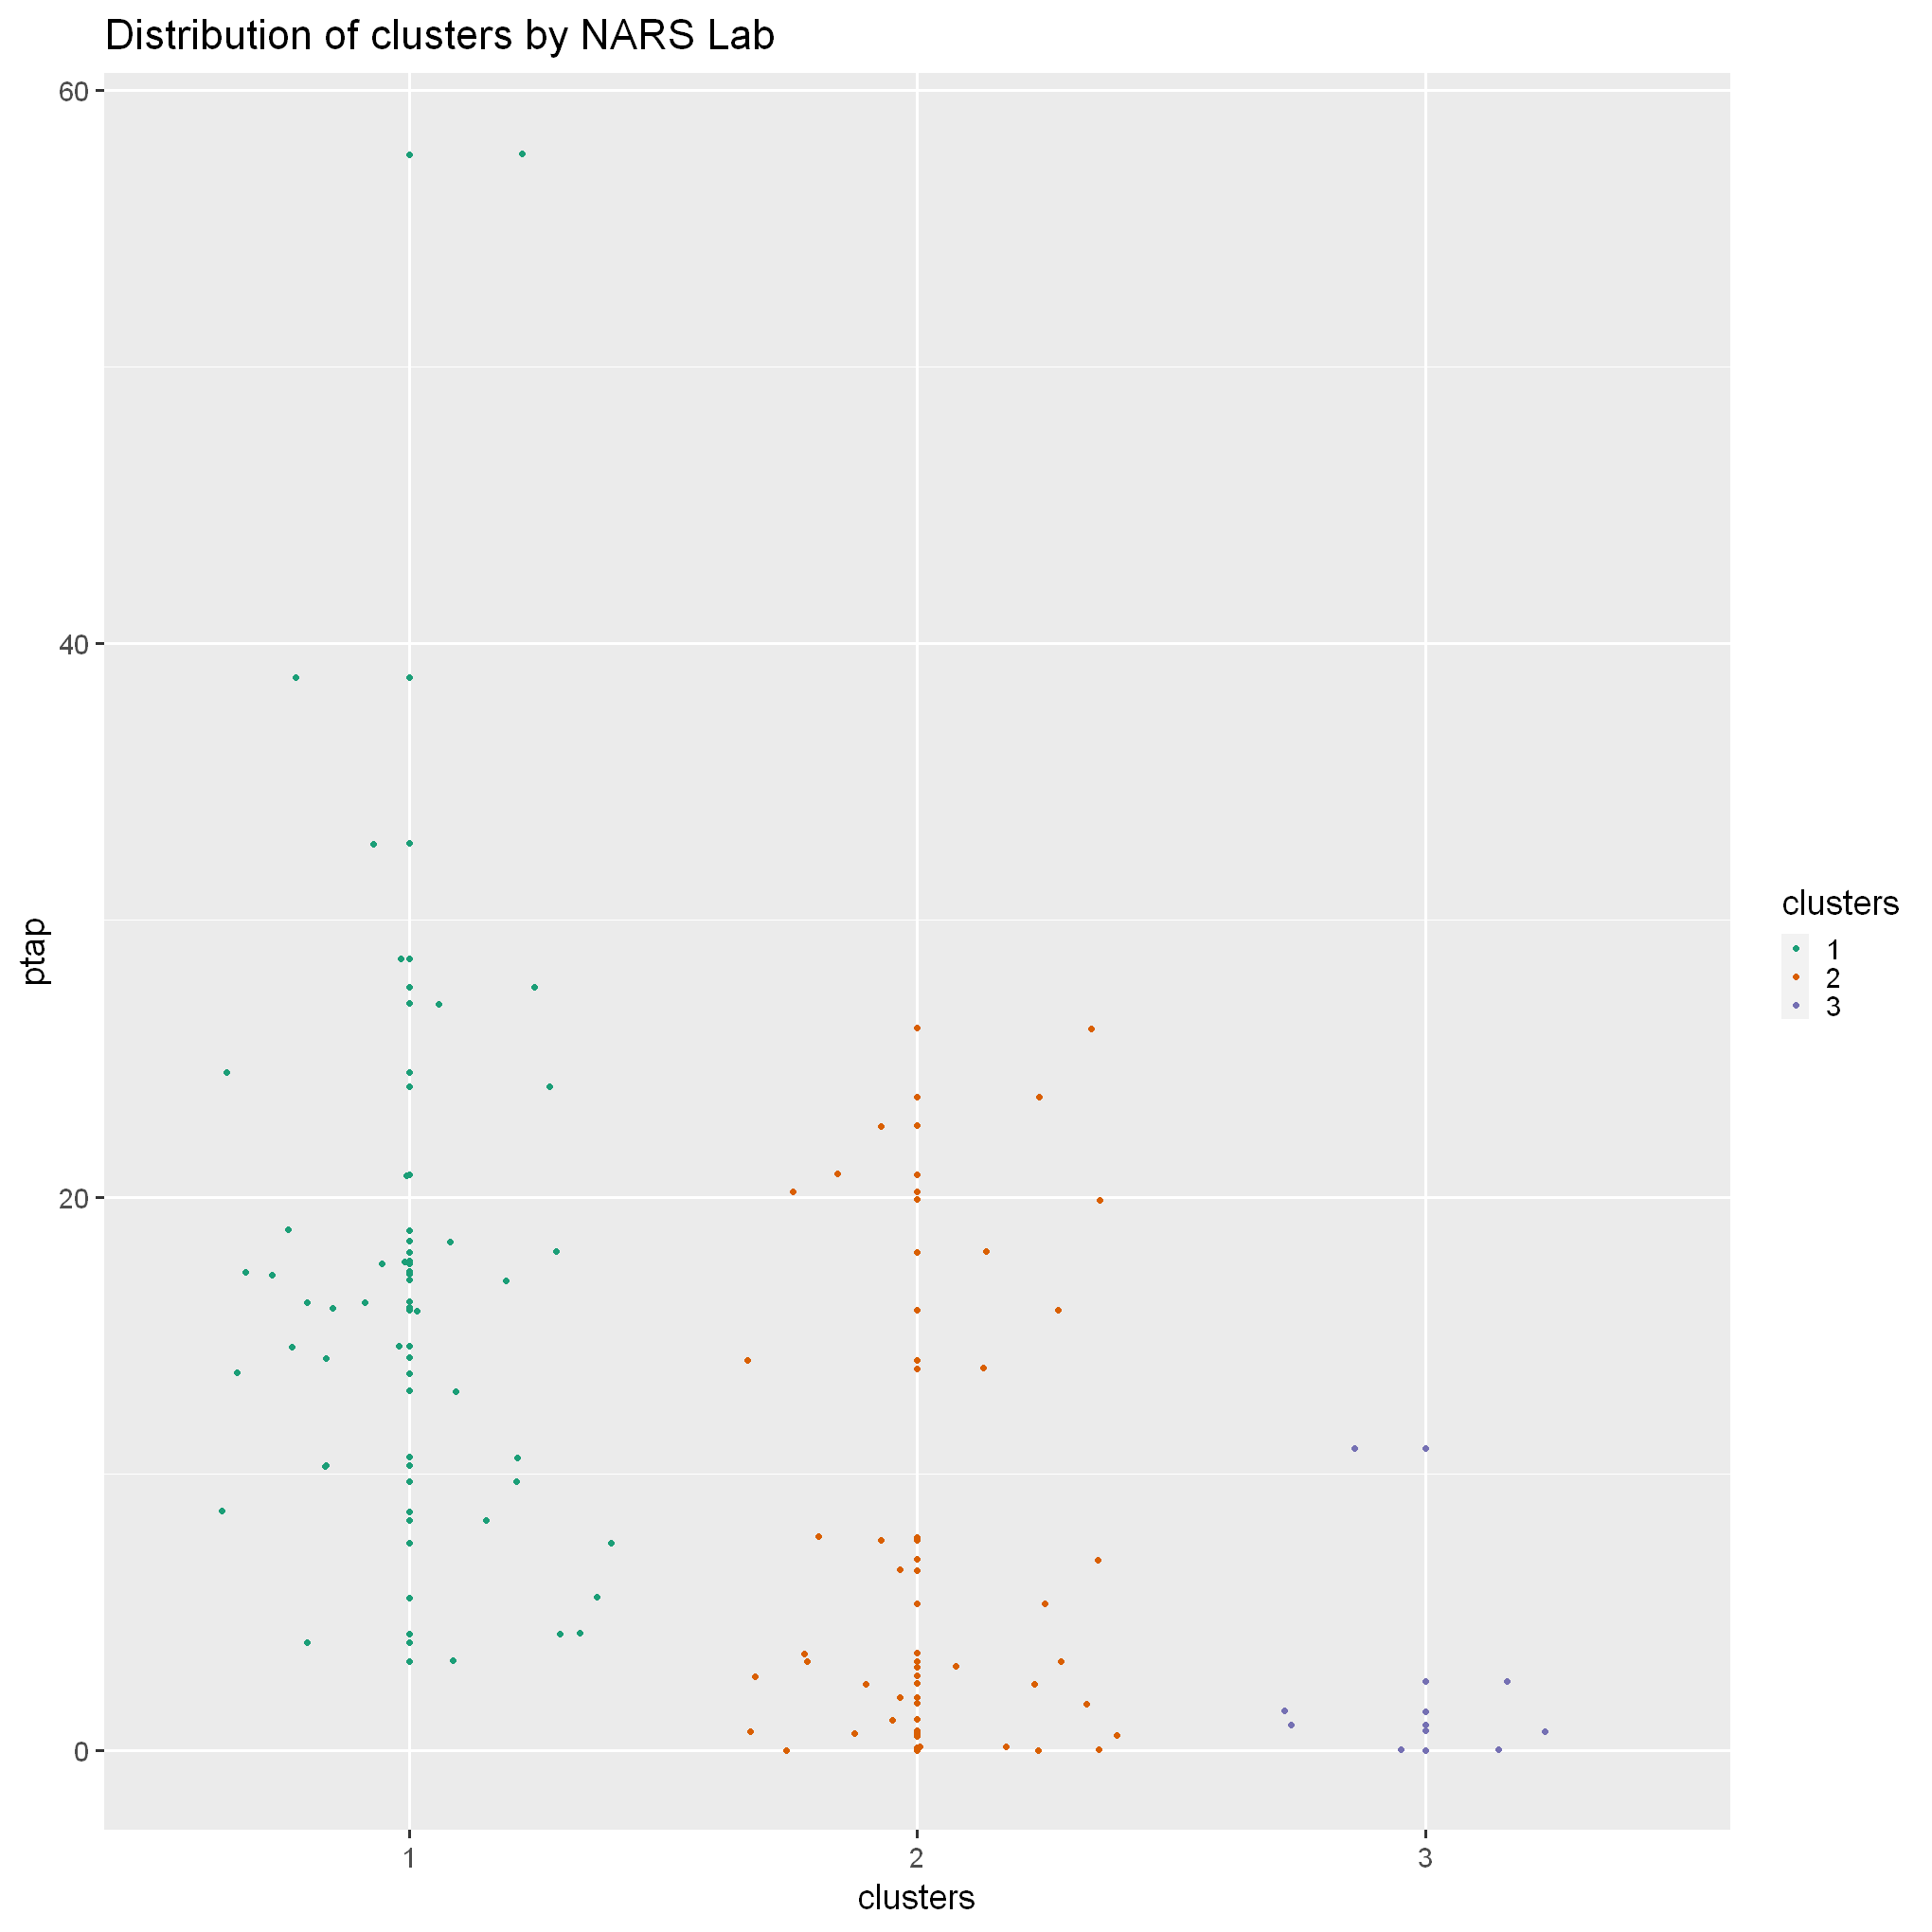

In [13]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,3)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df3_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


df3_clus_avg <- df4_clus_avg[ , 1:22]
df3_clus_avg
sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df3_clus_avg, columns = c(2:22), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df.wa %>% gather(Measure, Ranking, ptap:watp) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 3 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 3 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3"))
# set the set factor as for the clusters


# Rank Countries

In [ ]:
df = read_excel( "../../results/df-water-access.xlsx")

In [ ]:
head(df) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

In [ ]:
df["norm"] <- apply(df[3:13], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [ ]:
df["distToCentroid"] = 0 # initialize

In [ ]:
df.wa$clusters <- as.numeric(df.wa$clusters)
head(df.wa)
#Turn into numeric to find centroids

In [ ]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:24]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df)

In [ ]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
#df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , '../../results/dfcluster-rank.xlsx')

In [ ]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 25, 26)

In [ ]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

In [ ]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

In [ ]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

In [ ]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 25, 26)



In [ ]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
#cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

In [ ]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
# cluster.four %>% 
#  arrange_at("Country", desc) %>%
#   arrange_at("distToCentroid") %>%
#    arrange_at("clusters") %>%
#  select(1:3)

# World Map

In [ ]:
df = read_excel('../../results/dfcluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

In [ ]:
df = df[, c(1,26)] # select only country name and cluster number
head(df)

In [ ]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

In [ ]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

In [ ]:
setdiff(df$region,coords$name)

In [ ]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [ ]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [ ]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [ ]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

In [ ]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/